<a href="https://colab.research.google.com/github/wesszabo/Statistics-for-chemistry-students/blob/Gyakorlat/Statisztika_feladatok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id = "top"></a>
# Table of Contents

* [10. hét](#10)
    * [3. Feladat](#10.3)
    * [Megoldás](#10.3.1)
        * [b) gyakoriság, sűrűséghisztogram](#10.3.b)
        * [c)  tapasztalati eloszlásfüggvény](#10.3.c)
        * [d) tapasztalati várható érték, szórás](#10.3.d)
        * [f) szórás torzítatlan becslése](#10.3.f)
        * [g) populáció várható értékének 95%-os megbízhatósági szintű konfidencia intervalluma](#10.3.g)
    * [5. Feladat](#10.5)
    * [Megoldás](#10.5.1)
    * [Házi feladatok](#10.hf)
        * [1. Feladat](#10.hf.1)
        * [Megoldás](#10.hf.1.1)
            * [a) gyakoriság, sűrűséghisztogram](#10.hf.1.a)
            * [b) tapasztalati eloszlásfüggvény](#10.hf.1.b)
            * [c) tapasztalati várható érték, szórás](#10.hf.1.c)
            * [d) korrigált tapasztalati szórás](#10.hf.1.d)
            * [e) populáció várható értékének 95%-os megbízhatósági szintű konfidencia intervalluma](#10.hf.1.e)
        * [2. Feladat](#10.hf.2)
        * [Megoldás](#10.hf.2.1)
* [11. hét](#11)
    * [1. Feladat](#11.1)
    * [Megoldás](#11.1.1)
        * [a) gyakoriság, sűrűséghisztogram](#11.1.a)
        * [b) tapasztalati eloszlásfüggvény](#11.1.b)
        * [c) tapasztalati várható érték, szórás, korrigált empirikus szórásnégyzet](#11.1.c)
        * [e) populáció várható értékének 95%-os megbízhatósági szintű konfidencia intervalluma](#11.1.e)
    * [2. Feladat](#11.2)
    * [Megoldás](#11.2.1)
    * [3. Feladat](#11.3)
    * [Megoldás](#11.3.1)
    * [4. Feladat](#11.4)
    * [Megoldás](#11.4.1)
    * [5. Feladat](#11.5)
    * [Megoldás](#11.5.1)
    * [6. Feladat](#11.6)
    * [Megoldás](#11.6.1)

             

In [0]:
#######################   MODULOK

In [0]:
from sympy import *
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import HTML,Latex, display
import requests
import numpy as np
import math 
import sympy as sym
from sympy.solvers.solveset import solveset_real
from scipy import optimize
from numpy import pi, sin, cos
import plotly.graph_objects as go
import plotly.figure_factory as ff
from chart_studio.plotly import plot, iplot
import statsmodels.api as sm
from scipy import stats
from IPython.display import YouTubeVideo

In [0]:
import plotly.io as pio
#pio.renderers.default = "colab"
pio.renderers.default = "notebook_connected" 

In [0]:
# Jupyter to print the results for any variable or statement on it’s own line

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
!pip install --upgrade version_information

  Created wheel for version-information: filename=version_information-1.0.3-cp36-none-any.whl size=3880 sha256=fdf95c097f03960b88d391dcbc490997a0b3ceb38a647be7895a20da3641661c
  Stored in directory: /root/.cache/pip/wheels/1f/4c/b3/1976ac11dbd802723b564de1acaa453a72c36c95827e576321
Successfully built version-information


In [0]:
%load_ext version_information

%version_information numpy, scipy, IPython, matplotlib, plotly, statsmodels, seaborn, version_information

Software,Version
Python,3.6.8 64bit [GCC 8.3.0]
IPython,5.5.0
OS,Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
numpy,1.17.4
scipy,1.3.2
IPython,5.5.0
matplotlib,3.1.1
plotly,4.1.1
statsmodels,0.10.1
seaborn,0.9.0


In [0]:
#######################  BEÁLLÍTÁSOK 

In [0]:
# Sympy to print formula not TeX
from sympy import init_printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [0]:
def new_section(title):
    style = "text-align:center;background:#66aa33;padding:40px;color:#ffffff;font-size:3em;"
    return HTML('<div style="{}">{}</div>'.format(style, title))

In [0]:
def new_subsection(title):
    style = "text-align:center;background:CornflowerBlue;padding:40px;color:#ffffff;font-size:3em;"
    return HTML('<div style="{}">{}</div>'.format(style, title))

In [0]:
def empirical_dist(datalist, bins, xtitle):
    binned = np.histogram(datalist, bins=bins, density=True)
    plot_y = np.cumsum(binned[0])
    plot_y = plot_y/max(plot_y)
    # Line
    trace1 = go.Scatter(
        x=binned[1],
        y=plot_y,
        mode='lines',
        name="X",
        hoverinfo='all',
        line=dict(color = 'rgb(1255, 0, 0)', shape='hvh'
        )
    )

    data = [trace1]

    # Layout
    layout = dict(title = 'Empirical distribution function',
        legend=dict(
            y=0.5,
            traceorder='reversed',
            font=dict(
                size=16
            )
        ),
        xaxis = dict(
            title=xtitle
        )
    )

    # Make figure
    fig = go.Figure(data=data, layout=layout)

    # Plot
    fig.show()

In [0]:
def linear_regr_line(X, Y, coeffs, xtitle, ytitle):
    trace1 = go.Scatter(
                  x=X,
                  y=Y,
                  mode='markers',
                  name='Data'
                  )

    trace2 = go.Scatter(
                    x=X,
                    y=coeffs[0] + coeffs[1] * X,
                    mode='lines',
                    name='Fit'
                    )

    layout = go.Layout(
                    title='Linear Regression '+ 'y = ' + str(coeffs[1])[:6] + '*x + ' + str(coeffs[0])[:6],
                    plot_bgcolor='rgb(229, 229, 229)',
                    xaxis=dict(
                        title=xtitle
                    ),
                    yaxis=dict(
                        title=ytitle
                    )
                    )

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)

    fig.show()

<a id = "10"></a>

In [10]:
new_section("10. hét")

**Confidencia intervallum**

(a) Várható érték megbízhatósági intervallum becslése, **ha a sokaság szórása ismert**:

\begin{align*}
1-\alpha &=\text{megbízhatósági szint} \\
\overline{x}&=\text{a minta átlaga}\\
n &= \text{a minta elemszáma}\\
\sigma&=\text{a sokaság szórása}\\
Z_{1-\frac{\alpha}{2}}&=\text{a standard normális eloszlás $1-\frac{\alpha}{2}$ valószínűséghez 
tartozó $Z$ értéke}.
\end{align*}

Ekkor a megbízhatósági intervallum
$$
\left(\overline{x}-Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}},\,
\overline{x}+Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}} \right).
$$

(b) Várható érték megbízhatósági intervallum becslése, **ha a sokaság szórása nem ismert**:
$$
s=\text{a minta szórása} \left( s=\sqrt{{\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\bar {x}}\,)^{2}}. \right)
$$
$$
t_{_{1-\frac{\alpha}{2}}}=\text{a t-eloszlás $1-\frac{\alpha}{2}$ valószínűséghez 
tartozó $t$ értéke}.
$$
Ekkor a megbízhatósági intervallum
$$
\left(\overline{x}-t_{_{1-\frac{\alpha}{2}}}\cdot\frac{s}{\sqrt{n}},\,
\overline{x}+t_{_{1-\frac{\alpha}{2}}}\cdot\frac{s}{\sqrt{n}} \right).
$$

**Lineáris regresszió**

$y=\alpha x+\beta$.

\begin{aligned}
{\widehat {\alpha }}&={\bar {y}}-{\widehat {\beta }}\,{\bar {x}},\\[5pt]
{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-\bar {x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar {x})^{2}}}\\[6pt]
&={\frac {s_{x,y}}{s_{x}^{2}}}\\[5pt]&=r_{xy}{\frac {s_{y}}{s_{x}}}.\\[6pt]
\end{aligned}

* $\bar {x}$ and $\bar {y}$  the average of the $x_i$ and $y_i$, respectively
* $r_{xy}$ the sample correlation coefficient between $x$ and $y$
* $s_x$ and $s_y$ the uncorrected sample standard deviations of $x$ and $y$
* $s_x^2$ and $s_{x,y}$ the sample variance and sample covariance, respectively. 

A levezetés az alábbi videóban 

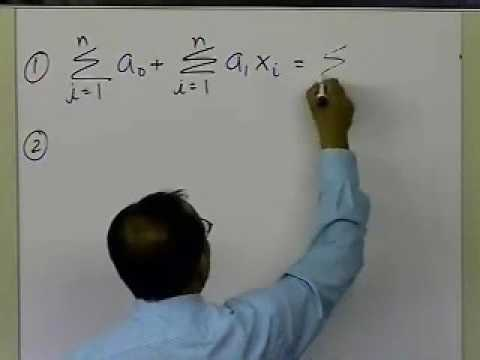

In [0]:
YouTubeVideo('DSQ2plMtbLc', width=724, height=476)

[Return to top](#top)

<a id = "10.3"></a>

In [11]:
new_subsection("3. Feladat")

Egy automata gépnek $200$ mm hosszúságú pálcikákat kéne készíteni. Előzetes 
adatfelvételből tudjuk, hogy a gép által gyártott termékek hossza normális 
eloszlású valószínűségi változó, $3$ mm
szórással. Az $n=16$ elemű minta elemeinek hosszmérete: 

193, 195, 198, 201, 204, 
196, 196, 196, 203, 199, 193, 198, 191, 191, 198, 200. 

a) Mit jelent, hogy a fenti egy statisztikai minta? 

b) Készítsünk gyakoriság, sűrűséghisztogramot 3-as lépésközzel! 

c) Mi lesz a tapasztalati eloszlásfüggvény? 

d) Mi a tapasztalati várható értéke, szórása? 

e) Torzítatlan becslései-e a fenti statisztikák a paramétereknek? És aszimptotikusan torzítatlan? 

f) Mi lesz a szórás torzítatlan becslése? 

g) Adjunk a populáció várható értékére 95%-os megbízhatósági szintű konfidencia intervallumot. 

<a id = "10.3.1"></a>
Megoldás

<a id = "10.3.b"></a>
b) gyakoriság, sűrűséghisztogram

In [12]:
datalist = [193, 195, 198, 201, 204, 
196, 196, 196, 203, 199, 193, 198, 191, 191, 198, 200]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=datalist, name="count"))
fig.add_trace(go.Histogram(histnorm="probability", x=datalist, name="probability"))
fig.update_layout(
    xaxis = go.layout.XAxis(
        title_text = "pálca hossza (mm)",
        title_font = {"size": 12},
        ),
    )

fig.show()

[Return to top](#top)

<a id = "10.3.c"></a>
c) tapasztalati eloszlásfüggvény

In [13]:
datalist = [193, 195, 198, 201, 204, 
196, 196, 196, 203, 199, 193, 198, 191, 191, 198, 200]
bins = math.ceil((max(datalist) - min(datalist)/2))
empirical_dist(datalist, bins, 'hosszúság (mm)')

[Return to top](#top)

<a id = "10.3.d"></a>
d) tapasztalati várható érték, szórás

In [14]:
print("A tapasztalati várható értéke: ", round(np.mean(datalist),5))
print("A tapasztalati szórása:", round(np.std(datalist),5))

A tapasztalati várható értéke:  197.0
A tapasztalati szórása: 3.77492


[Return to top](#top)

<a id = "10.3.f"></a>
f) szórás torzítatlan becslése

In [15]:
print("A szórás torzítatlan becslése: ", round(np.sqrt(len(datalist)/(len(datalist)-1)) * np.std(datalist),5) )

A szórás torzítatlan becslése:  3.89872


[Return to top](#top)

<a id = "10.3.g"></a>
g) Mivel ismert a szórás ezért a normális eloszlást használjuk

In [0]:
datalist = [193, 195, 198, 201, 204, 
196, 196, 196, 203, 199, 193, 198, 191, 191, 198, 200]

In [17]:
conf_int = stats.norm.interval(.95, loc = np.mean(datalist), scale = 3/np.sqrt(len(datalist))) # sigma=3
print(f'A 95%-hoz tartozó confidencia intervallum ({conf_int[0]:.5f}, {conf_int[1]:.5f}).')

A 95%-hoz tartozó confidencia intervallum (195.53003, 198.46997).


[Return to top](#top)

In [18]:
new_subsection("5. Feladat")

A Lángoló Rózsa kolostorban a penitenciaként kirótt (Miatyánk,Üdvözlégy)-ek 
száma a mai napon

(15,20); (25,30); (10,5); (10,10); (20,20); (25,20)

Adjon lineáris közelítést az "Üdvözlégy"-ek számából a "Miatyánk"-ok számára.

<a id = "10.5.1"></a>
Megoldás. 

In [0]:
data = [(15,20), (25,30), (10,5), (10,10), (20,20), (25,20)]
datalist = [[list(dat)[0], list(dat)[1]] for dat in data]
X = [_[1] for _ in datalist]
Y = [_[0] for _ in datalist]

In [20]:
X = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s in the first column
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     11.92
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0260
Time:                        21:53:04   Log-Likelihood:                -15.405
No. Observations:                   6   AIC:                             34.81
Df Residuals:                       4   BIC:                             34.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6452      3.779      1.494      0.2

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [0]:
coeffs = model.params

In [22]:
print(f'Az egyenes egyenlete: y = {coeffs[0]:.5f} + {coeffs[1]:.5f}*x. ')

Az egyenes egyenlete: y = 5.64516 + 0.67742*x. 


In [23]:
linear_regr_line(X[:, 1], Y, coeffs, 'Üdvözlégy (szám)', 'Miatyánk (szám)')

[Return to top](#top)

<a id = "10.hf"></a>
Házi feladat

<a id = "10.hf.1"></a>

In [24]:
new_subsection("1. Feladat")

Bizonyos ón-ólom ötvözet $\xi$ olvadáspontjának meghatározására 24 
véletlenszerűen kiválasztott mintadarabon mérést végeztek. $\left(^\circ C\right)$
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
330& 328.6& 342.4& 334& 337.5& 341& 343.3& 329.5\\
\hline
322& 331& 336.4& 326.5& 327.3& 338& 331& 332.3\\
\hline
345& 338.5& 329.7& 325.8& 322.6& 333& 339.2& 340\\
\hline
\end{array}

a) Készítsünk gyakoriság, sűrűséghisztogramot 4-es lépésközzel! 

b) Mi lesz a tapasztalati eloszlásfüggvény? 

c) Mi a tapasztalati várható értéke, szórása? 

d) Mi a korrigált tapasztalati szórás? 

e) Adjunk a várható értékre 95%-os megbízhatósági szintű konfidencia intervallumot.

<a id = "10.hf.1.1"></a>
Megoldás. 



<a id = "10.hf.1.a"></a>
a) gyakoriság, sűrűséghisztogram

In [0]:
datalist = [330, 328.6, 342.4, 334, 337.5, 341, 343.3, 329.5,
322, 331, 336.4, 326.5, 327.3, 338, 331, 332.3,
345, 338.5, 329.7, 325.8, 322.6, 333, 339.2, 340]

In [31]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=datalist, name="count"))
fig.add_trace(go.Histogram(histnorm="probability", x=datalist, name="probability"))
fig.update_layout(
    xaxis = go.layout.XAxis(
        title_text = r'hőmérséklet $\left(^\circ C\right)$',
        title_font = {"size": 12},
        ),
    )

fig.show()

[Return to top](#top)

<a id = "10.hf.1.b"></a>
b) tapasztalati eloszlásfüggvény

In [32]:
bins = math.ceil((max(datalist) - min(datalist)/3))
empirical_dist(datalist, bins, 'hőmérséklet $\left(^\circ C\right)$')

[Return to top](#top)

<a id = "10.hf.1.c"></a>
c) tapasztalati várható érték, szórás

In [33]:
print("A tapasztalati várható értéke: ", round(np.mean(datalist),5))
print("A tapasztalati szórása:", round(np.std(datalist),5))

A tapasztalati várható értéke:  333.525
A tapasztalati szórása: 6.41309


[Return to top](#top)

<a id = "10.hf.1.d"></a>
d) korrigált tapasztalati szórás

In [34]:
print("A korrigált tapasztalati szórás: ", round(np.sqrt(len(datalist)/(len(datalist)-1)) * np.std(datalist),5) )

A korrigált tapasztalati szórás:  6.55102


[Return to top](#top)

<a id = "10.hf.1.e"></a>
e) Mivel nem ismerjük a szórást, ezért $t$ eloszlást használunk.

In [35]:
conf_int = stats.t.interval(.95, len(datalist)-1, \
                            loc = np.mean(datalist), \
                            scale = stats.sem(datalist)) # stats.sem = s/sqrt(n)
print(f'A 95%-hoz tartozó confidencia intervallum ({conf_int[0]:.5f},{conf_int[1]:.5f}).')

A 95%-hoz tartozó confidencia intervallum (330.75875,336.29125).


[Return to top](#top)

<a id = "10.hf.2"></a>

In [36]:
new_subsection("2. Feladat")

A Lángoló Rózsa kolostorban a havi (Bablevesek, Káposztafőzelékek)-ek száma az utóbbi néhány hónapban: 

(3, 4); (6, 5); (2, 1); (2, 2); (4, 4); (4, 5). 

Adjon lineáris közelítést a "Bablevesek" számából a "Káposztafőzelékek" számára.

<a id = "10.hf.2.1"></a>
Megoldás.

In [0]:
data = [(3, 4), (6, 5), (2, 1), (2, 2), (4, 4), (4, 5)]
datalist = [[list(dat)[0], list(dat)[1]] for dat in data]
X = [_[0] for _ in datalist]
Y = [_[1] for _ in datalist]

In [38]:
X = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s in the first column
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     9.800
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0352
Time:                        21:59:21   Log-Likelihood:                -7.2313
No. Observations:                   6   AIC:                             18.46
Df Residuals:                       4   BIC:                             18.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3043      1.098      0.277      0.7

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [0]:
coeffs = model.params

In [40]:
print(f'Az egyenes egyenlete: y = {coeffs[0]:.5f} + {coeffs[1]:.5f}*x. ')

Az egyenes egyenlete: y = 0.30435 + 0.91304*x. 


In [41]:
linear_regr_line(X[:, 1], Y, coeffs, 'Bablevesek száma','Káposztafőzelékek száma')

[Return to top](#top)

<a id = "11"></a>

In [42]:
new_section("11. hét")

<a id = "11.1"></a>

In [43]:
new_subsection("1. Feladat")

A statisztika tanár gondol egyet és megméri egyik gyakorlati 
csoportjában a fiúk magasságát és a következő eredményeket kapja:

176,174,173,175,186,191,180,200,176,188,189,163,167,175,195

a) Adja meg 10-es lépésközzel, a gyakoriság hisztogramot, sűrűség hisztogramot.

b) Adjuk meg a tapasztalati eloszlásfüggvényt.

c) A rendelkezésre álló adatok alapján adja meg a férfiak magasságának empirikus várható értékét, empirikus szórásnégyzetét, korrigált empirikus szórásnégyzetét.

d) Melyik statisztika torzítatlan, aszimptotikusan torzítatlan, a két szórásnégyzet közül melyik hatékonyabb?

e) A fenti mintából adjon 95%-os megbízhatósági szintű konfidencia intervallumot a férfiak magasságának várható értékére.

<a id = "11.1.1"></a>
Megoldás. 

<a id = "11.1.a"></a>
a) gyakoriság hisztogram, sűrűség hisztogram

In [0]:
datalist = [176,174,173,175,186,191,180,200,176,188,189,163,167,175,195]

In [47]:
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count",  x=datalist, name="count"))
fig.add_trace(go.Histogram(histnorm="probability", x=datalist, name="probability"))
fig.update_layout(
    xaxis = go.layout.XAxis(
        title_text = 'magasság (cm)',
        title_font = {"size": 12},
        ),
    )

fig.show()

[Return to top](#top)

<a id = "11.1.b"></a>
b) tapasztalati eloszlásfüggvény

In [48]:
bins = math.ceil((max(datalist) - min(datalist)/9))
empirical_dist(datalist, bins, 'magasság (cm)')

[Return to top](#top)

<a id = "11.1.c"></a>
c) empirikus várható érték, empirikus szórásnégyzet, korrigált empirikus szórásnégyzet

In [49]:
print("A tapasztalati várható értéke: ", round(np.mean(datalist),5))
print("A tapasztalati szórása:", round(np.std(datalist),5))

A tapasztalati várható értéke:  180.53333
A tapasztalati szórása: 10.15787


In [50]:
print("A korrigált tapasztalati szórás: ", round(np.sqrt(len(datalist)/(len(datalist)-1)) * np.std(datalist),5) )

A korrigált tapasztalati szórás:  10.51439


[Return to top](#top)

<a id = "11.1.e"></a>
e) Mivel nem ismerjük a szórást, ezért $t$ eloszlást használunk

In [51]:
conf_int = stats.t.interval(.95, len(datalist)-1, \
                            loc = np.mean(datalist), \
                            scale = stats.sem(datalist)/np.sqrt(len(datalist))) # stats.sem = s
print(f'A 95%-hoz tartozó confidencia intervallum ({conf_int[0]:.5f},{conf_int[1]:.5f}).')

A 95%-hoz tartozó confidencia intervallum (179.02993,182.03674).


[Return to top](#top)

<a id = "11.2"></a>

In [52]:
new_subsection("2. Feladat")

<div class="exercises">
Megmértük 20 házaspár magasságát. A következő (Nő,Férfi) 
eredményeket kaptuk:

(171, 179), (175, 185), (163, 166), (175, 176), (172, 164), (155,176), 
(168, 185), (165, 173), (172, 179), (168, 175), (173,170), (163, 183), 
(156, 165), (183, 195), (171, 169), (169,177), (167, 173), (164, 179), 
(177, 180), (167, 183).

Regressziós egyenes segítségével adjunk becslést a Férj magasságából a
Feleség magasságára.
</div>

<a id = "11.2.1"></a>
Megoldás. 

In [0]:
data = [(171, 179), (175, 185), (163, 166), (175, 176), (172, 164), \
        (155,176), (168, 185), (165, 173), (172, 179), (168, 175), \
        (173,170), (163, 183), (156, 165), (183, 195), (171, 169), \
        (169,177), (167, 173), (164, 179), (177, 180), (167, 183)]
datalist = [[list(dat)[0], list(dat)[1]] for dat in data]
X = [_[1] for _ in datalist]
Y = [_[0] for _ in datalist]

In [54]:
X = sm.add_constant(X) # Our model needs an intercept so we add a column of 1s in the first column
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     4.457
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0490
Time:                        22:02:47   Log-Likelihood:                -63.781
No. Observations:                  20   AIC:                             131.6
Df Residuals:                      18   BIC:                             133.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9595     32.590      3.067      0.0

In [0]:
coeffs = model.params

In [56]:
print(f'Az egyenes egyenlete: y = {coeffs[0]:.5f} + {coeffs[1]:.5f}*x. ')

Az egyenes egyenlete: y = 99.95953 + 0.38924*x. 


In [57]:
linear_regr_line(X[:, 1], Y, coeffs, 'Férj magasság (cm)', 'Feleség magasság (cm)')

[Return to top](#top)

<a id = "11.3"></a>

In [58]:
new_subsection("3. Feladat")

Egy bizonyos fajta rák kísérleti (immunhiányos) egerekben 
véletlenszerűen (normális eloszlás szerint) nagy daganatot hoz létre, melynek várható értéke 2.5 mm, 
szórása 0.5 mm. Mielőtt kutatásba kezdenénk, kontrollkísérletet végzünk, 
hogy sejtvonalunk vajon megfelel-e a nagyvilágban máshol használt rákos 
sejteknek. 20 egeret megfertőzünk rákos sejtjeinkkel és két hónap után 
megmérjük az egerekben a daganat nagyságát. A következő mérési 
eredményeket kapjuk:

2.6, 4, 1.7, 2.5, 2.5, 2.7, 3.2, 2.4, 2.6, 2, 1.3, 1.7, 2.5, 2.6, 3.4, 2.7, 1.2, 2.2, 2.2, 2.6

Végezzünk statisztikai próbát arra nézve, hogy
ennek várható értéke 95%-os megbízhatósági szinten megegyezik-e 2,5 
centiméterrel!

<a id = "11.3.1"></a>
Megoldás. 

$u$-próbát használunk. ($Z$ test angolul) 

$H_0$: $E(X)=2.5$, nullhipotézis 

$H_1$: $E(X)\neq 2.5$, kétoldali ellenhipotézis. 

Az egymintás u-próba próbastatisztikája

$$
u=\frac {\bar {x}-\mu}{\sigma /{\sqrt {n}}},
$$

ahol 
$\bar {x}$ a vizsgált valószínűségi változó átlaga a mintában,
$\mu$ az előre adott érték, amihez az átlagot viszonyítjuk,
$\sigma$ a vizsgált valószínűségi változó ismert szórása és
$n$ a minta elemszáma.

In [0]:
datalist = [2.6, 4, 1.7, 2.5, 2.5, 2.7, 3.2, 2.4, 2.6, 2, 1.3, 1.7, 2.5, 2.6, 3.4, 2.7, 1.2, 2.2, 2.2, 2.6]
mu = 2.5
sigma = 0.5

In [0]:
# We will be using scipy stats normal survival function sf
#Here we mulitply the sf fucntion with 2 for two sided p value calculation , a two tail test 
u_value = (np.mean(datalist) - mu)/(sigma/np.sqrt(len(datalist)))
p_value = stats.norm.sf(abs(u_value))*2 

if p_value > 0.05:
    decision = r'Sample is likely drawn from <br>the same distribution (fail to reject $H_0$)'
else:
    decision = r'Sample is likely drawn from <br>different distribution (reject $H_0$)'

In [61]:
fig = go.Figure(data=[go.Table(
    columnwidth = [80,80,400],
    header=dict(values=['u-value', 'p-value', 'Decision'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align=['left','left','center'],
                font=dict(size=14),
                height=40),
    cells=dict(values=[[round(u_value,4)], # 1st column
                       [round(p_value,4)], # 2nd column
                       [decision]],        # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left',
               font=dict(size=12),
               height=30))
])

fig.show()

[Return to top](#top)

<a id = "11.4"></a>

In [62]:
new_subsection("4. Feladat")

Megmértük a déli hőmérsékletet Rejkjavik-ban március elején, és a következő hőmérsékleteket kaptuk:

3.5; −1.2; 4.7; 0.3; 2.8; 0; 5.8; 1.4; 2.2; 2.9; 2.2; 1.8; −1.7; −0.1;
2.8; 5.1; −2; 2.8; 3; 0.5 

Hasonlóképpen megmértük Amszterdamban

16.3; 13.6; 18.5; 18.1; 17.5; 21; 19.4; 15.3; 20.5; 16.8; 20; 18.4; 14.4;
18.7; 14.2; 13.8; 12.8; 16; 15.9; 14.2; 21.6; 17.6; 17.4; 18.4; 15.5; 16.3;
18.9; 10.8; 17.3; 16.5 

Modhatjuk-e 95%-os szignifikancia szint mellett, hogy azonos a szórásuk (feltesszük hogy a hőmérséklet eloszlása normális)?

<a id = "11.4.1"></a>
Megoldás. 

$F\,$-próbát használunk. 

Legyen $X_1, \ldots, X_n$ és $Y_1, \ldots, Y_m$ független minta két populációból, ahol mindkét populáció normális eloszlással rendelkezik. A két populáció várható értékei lehetnek különbözőek, a nullhipotézis pedig az, hogy a varianciájuk egyenlő $(H_{0}\colon \,\sigma _{X}^{2}=\sigma _{Y}^{2})$. Legyenek

$$
\overline {X}=\frac {1}{n}\sum _{i=1}^{n}X_{i} \quad
\text{és} \quad\overline {Y}=\frac {1}{m}\sum _{i=1}^{m}Y_{i}
$$

a minták tapasztalati átlagai és legyenek

$$
S_{X}^{2}=\frac {1}{n-1}\sum _{i=1}^{n}\left(X_{i}-\overline {X}\right)^{2}
$$
és 
$$
S_{Y}^{2}=\frac {1}{m-1}\sum _{i=1}^{m}\left(Y_{i}-\overline {Y}\right)^{2}
$$

a minták korrigált tapasztalati varianciái. Ekkor a próbastatisztikának az

$$
F_{emp}={\frac {S_{X}^{2}}{S_{Y}^{2}}},
$$

empirikus értéket használjuk ha a tört értéke nagyobb $1$-nél,  ellenkező esetben a reciprokát. $F$-nek $F$-eloszlása van, de az $F$-statisztika eloszlása különböző mintanagyságok esetén különböző. Azt, hogy melyik $F$-eloszlást kell választanunk, azaz az $F$-eloszlás paramétereit, a minták szabadsági foka mutatja meg, ami $n – 1$ és $m – 1$.

Adott szignifikanciaszint (szokásos $p = 0.05$-ot választani, kétoldali próba esetén $p=0.025$) mellett kikeressük $F(n–1, m–1)$ (vagy $F(m-1,n-1)$) értékét táblázatból, ez lesz a kritikus érték. Ha $F_{emp} \leq F_{krit}$, akkor elfogadjuk a $H_0$ nullhipotézist, azaz a szórásnégyzetek egyenlősége igaz, különben elvetjük.

In [0]:
reykjavik = [3.5, -1.2, 4.7, 0.3, 2.8, 0, 5.8, 1.4, 2.2, 2.9, 2.2, 1.8, -1.7, -0.1, 2.8, 5.1, -2, 2.8, 3, 0.5]
amsterdam = [16.3, 13.6, 18.5, 18.1, 17.5, 21, 19.4, 15.3, 20.5, 16.8, 20, 18.4, 14.4, 18.7, 14.2, 13.8, 12.8, \
             16, 15.9, 14.2, 21.6, 17.6, 17.4, 18.4, 15.5, 16.3, 18.9, 10.8, 17.3, 16.5]

In [0]:
F_value = np.var(reykjavik, dtype=np.float64, ddof=1)/np.var(amsterdam, dtype=np.float64, ddof=1)
df1 = len(reykjavik) - 1
df2 = len(amsterdam) - 1
if F_value < 1:
    F_value = 1/F_value
    df1 = len(amsterdam) - 1
    df2 = len(reykjavik) - 1
p_value = stats.f.sf(F_value, df1, df2)*2 
print('p value' , p_value)
if p_value > 0.05:
    print('Variance is likely the same (fail to reject H0)')
else:
    print('Variance is likely different (reject H0)')

p value 0.49889933744295506
Variance is likely the same (fail to reject H0)


In [0]:
fig = go.Figure(data=[go.Table(
    columnwidth = [80,80,400],
    header=dict(values=['u-value', 'p-value', 'Decision'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align=['left','left','center'],
                font=dict(size=14),
                height=40),
    cells=dict(values=[[round(u_value,4)], # 1st column
                       [round(p_value,4)], # 2nd column
                       [decision]],        # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left',
               font=dict(size=12),
               height=30))
])

fig.show()

[Return to top](#top)

<a id = "11.5"></a>

In [0]:
new_subsection("5. Feladat")

Egy sörgyárban újfajta sört szeretnének előállítani 5%-os 
alkoholtartalommal. Megmérnek 20 
mintát és a következő eredmény kapják:

4.49, 4.76, 4.38, 4.57, 5.45, 4.85, 4.72, 4.46,4.92, 4.63, 4.59, 4.5, 4.25, 
5.23, 4.3, 4.81, 4.96, 4.43, 5.26, 4.11

Állíthatjuk-e 95%-os valószínűséggel, hogy a sör megfelelő 
alkoholtartalommal rendelkezik? És 99%-os valószínűséggel állíthatjuk? Feltételezzük, hogy a minta eloszlása normális.

<a id = "11.5.1"></a>
Megoldás. 

Egymintás $t$ próbát használunk, mert nem ismerjük a populáció szórását. 

$H_0$: $E(X)=5$, nullhipotézis 

$H_1$: $E(X)\neq 5$, kétoldali ellenhipotézis. 

Az egymintás $t$-próba próbastatisztikája

$$
t=\frac {\bar {x}-\mu}{s /{\sqrt {n}}},
$$

ahol 
$\bar {x}$ a vizsgált valószínűségi változó átlaga a mintában,
$\mu$ az előre adott érték, amihez az átlagot viszonyítjuk,
$s$ a minta korrigált tapasztalati szórása és
$n$ a minta elemszáma.

In [0]:
datalist = [4.49, 4.76, 4.38, 4.57, 5.45, 4.85, 4.72, 4.46,4.92, 4.63, 4.59, 4.5, 4.25, 
5.23, 4.3, 4.81, 4.96, 4.43, 5.26, 4.11]

[Return to top](#top)

<a id = "11.6"></a>

In [0]:
new_subsection("6. Feladat")

Egy új gyógyszer hatását teszteljük egereken. Az egereket ún. kettős
vakpróbának (t.i. ahol még a kísérlet vezetője se tudja, hogy ki kap
gyógyszert és ki nem) vetjük alá. Az egereket megfertőzzük a betegséggel
(mondjuk rákkal). Ezután két részre osztjuk az egereket. Mindegyik
részt 10 darab, húsz egeret számláló csoportra osztjuk. Az egyik résznek
gyógyszert adunk, a másiknak placebót (de mi se tudjuk melyiknek mit).
Egy hónap múlva leszámoljuk a meglévő egereket, megnézzük hogy mit
kaptak és azt találjuk, hogy a gyógyszerrel kezelt részben a huszas 
csoportokból rendre

11,14,15,15,11,15,10,11,9,14

darab egér maradt maradt életben. A placebóval kezelt részből pedig
csoportonként

9,13,10,12,11,7,10,8,5,8

egér maradt életben.
Statisztikai próbát végzünk, hogy megnézzük hogy 95%-os megbízhatósági
szint mellett lehetséges-e, hogy a két valószínűségi változó egyenlő? E
szerint a próba szerint hatásos volt a gyógyszer?

<a id = "11.6.1"></a>
Megoldás. 

[Return to top](#top)

**Házi feladat**

1.Feladat

In [0]:
new_subsection("1. Feladat")

A statisztika tanár gondol egyet és megméri egyik gyakorlati 
csoportjában a nők magasságát a következő eredményeket kapja

173,164,174,167,168,157,173,170,161,170

a) A rendelkezésre álló adatok alapján adja meg a nők magasságának
empirikus várható értékét, empirikus szórásnégyzetét, korrigált 
empirikus szórásnégyzetét.

b) Melyik statisztika torzítatlan, aszimptotikusan torzítatlan, a két 
szórásnégyzet közül melyik hatékonyabb?

c) Végezzünk $t$-próbát annak eldöntésére, hogy 95%-os megbízhatósági
szinten megegyezik-e a várható érték 165-tel!

Megoldás. 

a) tapasztalati várható érték, szórás, korrigált tapasztalati szórás

In [0]:
datalist = [173,164,174,167,168,157,173,170,161,170]

In [0]:
print("A tapasztalati várható érték: ", np.mean(datalist))
print("A tapasztalati szórás:", np.std(datalist))
print("A korrigált tapasztalati szórás: ", np.sqrt(len(datalist)/(len(datalist)-1)) * np.std(datalist) )

A tapasztalati várható érték:  167.7
A tapasztalati szórás: 5.292447448959697
A korrigált tapasztalati szórás:  5.57872944515346


[Return to top](#top)

c) 

![alt text](https://drive.google.com/uc?id=1OW-y2gdss3EiwapRUhC3rDHwqsS4Yq1f)

In [0]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>